In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [86]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from umap import UMAP

from prince import MCA, FAMD

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

<IPython.core.display.Javascript object>

In [19]:
data_url = "https://github.com/jhl126/bostonmarathon/blob/master/results/2014/results.csv?raw=true"

df = pd.read_csv(data_url)
df = df.drop(columns=["ctz"])

print("Columns with highest percent NA:")
# fmt: off
display(
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .head()
)
# fmt: on

df.head()

Columns with highest percent NA:


state        0.080540
city         0.000031
40k          0.000000
genderdiv    0.000000
name         0.000000
dtype: float64

,10k,name,division,25k,gender,age,official,bib,genderdiv,35k,overall,pace,state,30k,5k,half,20k,country,city,40k
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,71.40,8,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,116.37,21,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,67.42,1,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,116.37,27,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,67.83,2,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72


<IPython.core.display.Javascript object>

In [20]:
df = df.dropna(subset=["city"])

<IPython.core.display.Javascript object>

In [22]:
# Not dropping nas in state because it mainly
# means they are not from US or Canada
df["state"] = df["state"].fillna("Not US/CAN")

<IPython.core.display.Javascript object>

In [9]:
df["state"].value_counts()

MA            7587
Not US/CAN    2575
CA            2326
NY            1553
ON            1052
              ... 
YT               5
NT               3
AA               1
AP               1
GU               1
Name: state, Length: 69, dtype: int64

<IPython.core.display.Javascript object>

In [24]:
df = df.replace("-", np.nan)

<IPython.core.display.Javascript object>

In [27]:
df.isna().mean().sort_values(ascending=False).head()

25k     0.006754
half    0.002251
5k      0.001626
20k     0.001595
10k     0.001563
dtype: float64

<IPython.core.display.Javascript object>

In [28]:
df = df.dropna()

<IPython.core.display.Javascript object>

In [34]:
# Try ro change all columns to numeric
#if theres an error, ignore it and move to the next column
df = df.apply(pd.to_numeric, axis=0, errors="ignore")
df.dtypes

10k          float64
name          object
division       int64
25k          float64
gender        object
age            int64
official     float64
bib           object
genderdiv      int64
35k          float64
overall        int64
pace         float64
state         object
30k          float64
5k           float64
half         float64
20k          float64
country       object
city          object
40k          float64
dtype: object

<IPython.core.display.Javascript object>

In [36]:
nums = df.select_dtypes("number")
nums.head()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
0,17.37,8,47.67,47,85.25,8,71.40,8,3.27,59.18,8.02,39.72,37.65,80.43
1,32.58,1,82.43,33,138.95,1,116.37,21,5.30,99.33,16.22,69.47,65.83,132.10
2,16.62,1,45.80,41,80.60,1,67.42,1,3.08,56.45,7.75,38.03,36.10,76.10
3,32.57,3,82.43,24,140.58,3,116.37,27,5.37,99.33,16.20,69.47,65.83,132.95
4,17.12,2,46.37,40,81.23,2,67.83,2,3.10,57.03,8.02,38.60,36.58,76.72


<IPython.core.display.Javascript object>

In [37]:
scaler = StandardScaler()
scaled = scaler.fit_transform(nums)

<IPython.core.display.Javascript object>

In [38]:
pca = PCA(2)
pcs = pca.fit_transform(scaled)

<IPython.core.display.Javascript object>

In [61]:
pc_df = pd.DataFrame(pcs, columns=["pc1", "pc2"])
pc_df["label"] = df["age"]

<IPython.core.display.Javascript object>

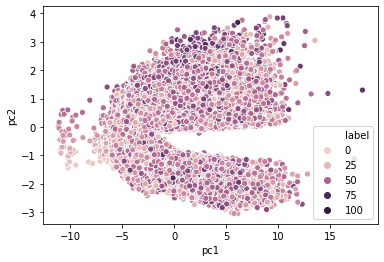

<IPython.core.display.Javascript object>

In [62]:
sns.scatterplot(x="pc1", y="pc2", hue="label", data=pc_df)

In [53]:
pca.explained_variance_ratio_

array([0.83416756, 0.10967037])

<IPython.core.display.Javascript object>

In [60]:
weights = pd.DataFrame(pca.components_, columns=nums.columns).T
weights.style.background_gradient()

,0,1
10k,0.283488,0.021137
division,0.157102,-0.627550
25k,0.289446,0.009784
age,0.048196,0.771460
official,0.288792,0.006617
genderdiv,0.258400,0.094360
35k,0.290136,0.003060
overall,0.281918,0.025769
pace,0.288793,0.006595
30k,0.290193,0.005963


<IPython.core.display.Javascript object>

In [72]:
k_means = KMeans(3)
k_means.fit(pcs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<IPython.core.display.Javascript object>

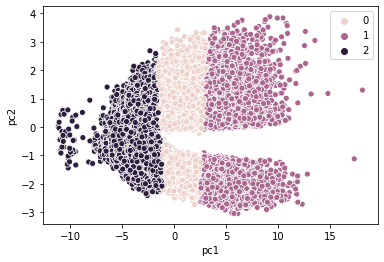

<IPython.core.display.Javascript object>

In [73]:
sns.scatterplot(x="pc1", y="pc2", hue=k_means.labels_, data=pc_df)

In [74]:
df["cluster"] = k_means.labels_

clst_means = df.groupby("cluster").mean()
clst_means.style.background_gradient()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k
cluster,,,,,,,,,,,,,,
0,52.789474,1813.927077,135.722730,46.337038,246.618976,9231.419776,199.173185,18780.959117,9.414500,166.381119,26.315080,113.212487,107.233922,232.370701
1,64.224908,3562.420738,172.316014,41.888839,318.963867,13997.986703,258.501174,28212.639026,12.173708,214.176136,31.612323,141.600589,133.951349,301.313687
2,43.819710,1160.007207,110.959265,38.788786,196.577238,3626.061614,159.857445,6395.489744,7.505790,134.816389,21.911179,93.150347,88.279096,185.349886


<IPython.core.display.Javascript object>

In [76]:
df.loc[df["cluster"] == 0, "country"].value_counts().head()

USA    10330
CAN     1022
GBR      125
ITA       98
GER       92
Name: country, dtype: int64

<IPython.core.display.Javascript object>

In [80]:
objs = df.select_dtypes("O")

objs = objs.drop(["name", "bib", 'city'], 1)


<IPython.core.display.Javascript object>

In [81]:
sample = objs.sample(frac=0.5, random_state=42)
mca = MCA()
mca.fit(sample)

MCA(benzecri=False, check_input=True, copy=True, engine='auto', n_components=2,
    n_iter=10, random_state=None)

<IPython.core.display.Javascript object>

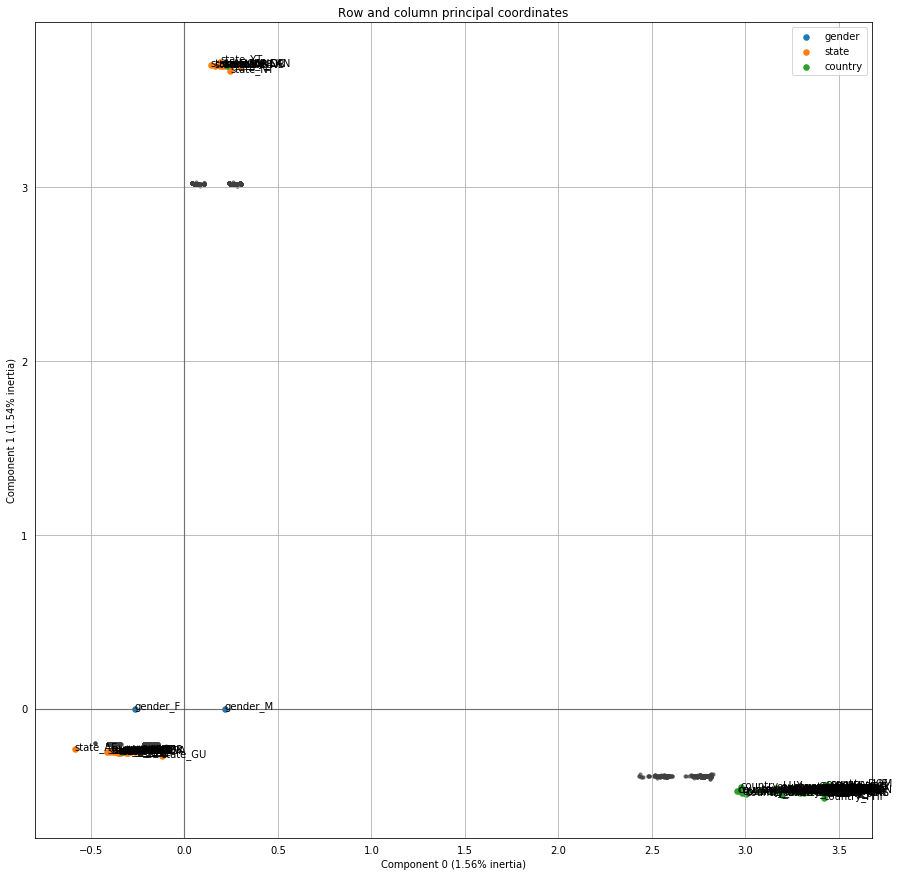

<IPython.core.display.Javascript object>

In [84]:
mca.plot_coordinates(sample, show_column_labels=True, figsize=(15, 15))

In [85]:
mcs = mca.row_coordinates(sample)

plot_df = sample.copy()
plot_df["c1"] = mcs.iloc[:, 0]
plot_df["c2"] = mcs.iloc[:, 1]
plot_df


,gender,state,country,c1,c2
1926,M,CO,USA,-0.185977,-0.203318
20841,M,Not US/CAN,JPN,2.754875,-0.388799
4419,M,NY,USA,-0.182629,-0.204203
10524,M,WA,USA,-0.181425,-0.203865
25140,F,MA,USA,-0.386492,-0.203678
...,...,...,...,...,...
22564,F,MA,USA,-0.386492,-0.203678
22436,M,MA,USA,-0.191211,-0.203763
6748,M,MN,USA,-0.176661,-0.203554
4294,M,CT,USA,-0.183993,-0.204328


<IPython.core.display.Javascript object>

In [89]:
px.scatter(data_frame=plot_df, x="c1", y="c2", color="gender")

<IPython.core.display.Javascript object>